# 机器学习作业:基于KNN 的手写数字识别
- 姓名：卢麒萱
- 学号：2010519
- 专业：计算机科学与技术

### 实验要求
题目：基于KNN 的手写数字识别
实验条件：给定semeion手写数字数据集，给定kNN分类算法
实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：将实验过程结果等图示展出

**截止日期：10月7日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [23]:
import numpy as np
import pandas as pd
import operator
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

### 导入数据集 semesion

In [24]:
# 导入数据
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [25]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)

/tmp/ipykernel_8818/2757158993.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  returnMat[i][j] = np.float(s1[j])


((1593, 256), (1593, 1))

### 基本要求
编程实现kNN算法；给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（模板中采用的是普通方法分割训练集和测试集，作业中需要用留一法）

In [26]:
# KNN算法手动实现
from operator import index


def MyKnnClassifier(data_X, data_y, neighbors):
    # 生成数据集和测试集
    kf = KFold(n_splits = 4,shuffle = False,random_state = None)
    data = np.append(data_X, data_y, axis=1)
    attri = ""
    for i in range(256):
        attri_tmp = 'x' + str(i)
        # print(attri_tmp)
        attri = attri + attri_tmp + ","
    attri = attri + "y"
    b = np.savetxt('./tmp.csv', data, fmt="%d", header = attri, delimiter=',')
    # print(data_X.shape)
    # print(data_y.shape)
    # print(data.shape)
    testRes = []  # 存放测试结果
    acc = 0   # 计算准确率
    for index, test in enumerate(data): 
        # 留一法
        # 训练集为当前数据以外的数据合并
        if index == 0:
            train = data[1::, ::]
        elif index == data.shape[0]-2:
            train = data[:index-1:, ::]
        else:
            train_r = data[index+1::, ::]    
            train_l = data[0:index:, ::]
            # print(train_r.shape)
            # print(train_l.shape)
            train = np.append(train_l, train_r, axis = 0)

        cols = len(train[0]) # 训练集每组中x和y的总数(y为最后一位)
        y_train = train[::, cols-1::] # 训练集为二维
        X_train = train[::, :cols-1:]
        X_test = test[:cols-1:]
        X_test  = X_test.reshape(1, X_test.shape[0])
        y_test = test[cols-1::]
        y_test  = y_test.reshape(1, y_test.shape[0])

        # 针对测试集中样本进行预测
        trainShape = X_train.shape[0]   # 获得训练集的大小
        testShape = X_test.shape[0] # 获得测试集的大小(为1)

        # print(trainShape)
        # print(testShape)
        # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
        #print(X_test[0].shape)
        testDiffMat = np.tile(X_test[0],(trainShape, 1)) - X_train
        sqTestDiffMat = testDiffMat ** 2    # 将差异矩阵平方
        # 方差距离为方差矩阵的整行求和，是一个一位列向量
        sqTestDiffDis = sqTestDiffMat.sum(axis=1)
        testDiffDis = sqTestDiffDis ** 0.5  # 开方生成标准差距离
        sortIndex = np.argsort(testDiffDis)   # 将标准差距离按照下标排序
        labelCount = []
        for j in range(neighbors):  # 考察k近邻属于哪些类
            labelCount.append(y_train[sortIndex[j]][0])
        classifyRes = Counter(labelCount)    # 把k近邻中最多的那个标签作为分类结果
        classifyRes = classifyRes.most_common(2)[0][0]
        testRes.append(classifyRes)
        if classifyRes == y_test[0]:  # 分类正确则将accRate+1
            acc += 1
    accRate = acc / data.shape[0]
    print('k={0}时，测试个数为{1}  正确个数为：{2}  准确率为：{3}'.format(neighbors,data.shape[0],acc,accRate))
    return accRate

实验结果：

In [30]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356


0.9152542372881356

### 中级要求
模板中与sklearn机器学习包中的kNN分类结果进行对比（作业中需要与weka机器学习包中的kNN分类结果进行对比）

实验结果：

k=1时，weka机器学习包训练手写体识别的准确率为：91.4626%

![](1.png)

k=3时，weka机器学习包训练手写体识别的准确率为：90.3327%

![](3.png)

k=5时，weka机器学习包训练手写体识别的准确率为：90.2699%

![](5.png)

### 高级要求
将实验过程结果等图示展出
此处在weka中手动设置k值1-10，得出结果进行比较。

In [33]:
scores1 = []
scores2 = [0.914626, 0.88575, 0.903327, 0.901444, 0.902699, 0.902699, 0.903327, 0.89705, 0.895961, 0.895961]

for k in range(1,11):
    score1 = MyKnnClassifier(X, y, k)
    scores1.append(score1)

k=1时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=2时，测试个数为1593  正确个数为：1459  准确率为：0.9158819836785939
k=3时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=4时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434
k=5时，测试个数为1593  正确个数为：1458  准确率为：0.9152542372881356
k=6时，测试个数为1593  正确个数为：1464  准确率为：0.9190207156308852
k=7时，测试个数为1593  正确个数为：1469  准确率为：0.9221594475831764
k=8时，测试个数为1593  正确个数为：1472  准确率为：0.9240426867545511
k=9时，测试个数为1593  正确个数为：1471  准确率为：0.9234149403640929
k=10时，测试个数为1593  正确个数为：1465  准确率为：0.9196484620213434


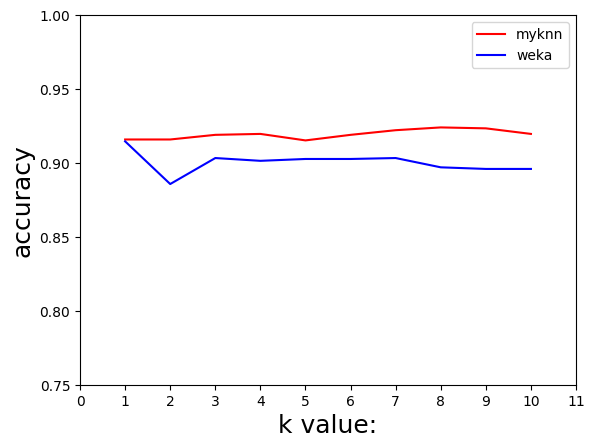

In [34]:
plt.xlabel('k value:',fontsize=18)
plt.ylabel('accuracy',fontsize=18)
x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 11)
plt.ylim(0.75, 1)
# 普通kNN分类精度
l1 = plt.plot(range(1,11),scores1,'r', label = 'myknn')
l2 = plt.plot(range(1,11),scores2,'b', label = 'weka')
plt.legend(loc='upper right')
plt.show()